# KNN mit dem Titanic-Datensatz

- Der originale Datensatz kann hier abgerufen werden: https://www.kaggle.com/c/titanic
- Der hier verwendete Datensatz wurde zwecks Einfachheit bereits überarbeitet und angereichtert

## Lade Libraries und Daten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
from sklearn.model_selection import train_test_split
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.mode.chained_assignment = None

DF = pd.read_csv('data/titanic_enh.csv')

In [2]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,1,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,0,1,1,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,1,2,0,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,1,0,0,211536,1,NaN,0,0,1,1,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,1,0,0,112053,2,B42,0,1,1,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,1,2,W./C. 6607,2,NaN,0,0,4,0,4
889,890,1,1,"Behr, Mr. Karl Howell",1,1,0,0,111369,2,C148,1,1,1,1,1


### Lade nötige Library/Libraries für KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

### Trainiere KNN Classifier mit Trainingsdaten

In [4]:
df = DF.copy()

# Split data into training and test set
train, test = train_test_split(df, test_size=0.2)

# Create Input- and Output-Structure and train Classifer
training_columns = ['Pclass', 'Sex', 'Age','Fare','Embarked', 'Has_Cabin', 'FamilySize', 'IsAlone', 'Title']
X = train[training_columns]
y = train[['Survived']]

# Instantiate knn model
knn = KNeighborsClassifier(n_neighbors=6)

# Train the model using the training sets
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Treffe Vorhersagen für Testdaten und berechne Performance-Metrik

In [5]:
# Calculate predictions for test set
X = test[training_columns]
y = test[['Survived']]
y['Prediction'] = knn.predict(X)

# Calculate Performance Metric
y['match'] = y['Survived'] == y['Prediction']
performance =  sum(y['match']) / len(y)
print('Performance: {:.1%}'.format(performance))

Performance: 79.9%


### Suche Hyperparameter

Die höchste Performance von 81.6% wurde mit einer Anzahl von 27 Nachbarknoten erreicht.


<AxesSubplot:>

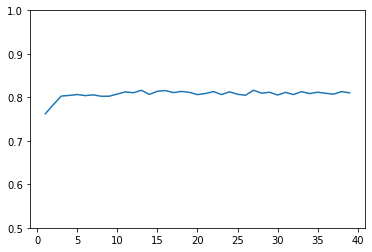

In [6]:
number_of_neighbours = []
neighbour_performance = []
tries = 100
max_performance = 0
max_performance_neighbours = 0

for i in range(1, 40):
    neighbours = i
    overall_perf = 0
    for j in range(tries):
        # Create Decision Tree classifer object
        knn = KNeighborsClassifier(n_neighbors=neighbours)

        # Sample for KFold
        df = DF.copy()
        train, test = train_test_split(df, test_size=0.2)

        # Create Input- and Output-Structure and train Decision Tree Classifer
        training_columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'IsAlone', 'Title']

        X = train[training_columns]
        y = train[['Survived']]
        clf = knn.fit(X, y)

        # Create Predictions
        X = test[training_columns]
        y = test[['Survived']]
        y['Prediction'] = clf.predict(X)

        # Calculate Performance Metric
        y['match'] = y['Survived'] == y['Prediction']
        performance =  sum(y['match']) / len(y)
        overall_perf = overall_perf + performance
        
    number_of_neighbours.append(neighbours)
    neighbour_performance.append(overall_perf/tries)
    if overall_perf/tries > max_performance:
        max_performance = overall_perf/tries
        max_performance_neighbours = neighbours
    #print('Performance of Depth {}: {:.1%}'.format(depth, overall_perf/tries))

print('Die höchste Performance von {:.1%} wurde mit einer Anzahl von {} Nachbarknoten erreicht.'.format(max_performance, max_performance_neighbours))
g = sns.lineplot(x=number_of_neighbours, y=neighbour_performance)
g.axes.set_ylim(0.5,1)
g